# Lunar Lander: Simulation = Python + Math

## Landing on the moon

Let's build a lunar lander that has limited fuel, and try to land on the moon without crashing.

Here is a sample plot of a lander's altitude over time... this flight didn't go so well:

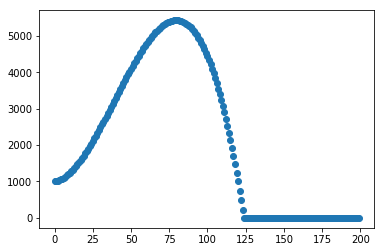

## 1. Create a Lunar Lander class in Python

For starters, define a **python class** for a lunar lander that includes **instance variables** for mass and fuel:

In [ ]:
class LunarLander:                   # the class name is LunarLander
    def __init__(self, mass, fuel):  # __init__ gets called whenever we create a new instance of a class
        self.mass = mass             # ...the 'self' keyword means 'this instance of this class'
        self.fuel = fuel             # ...python requires 'self' for instance variables

So far, a lunar lander doesn't do anything, but we can make one if we want to:

In [ ]:
# here is a useless lunar lander. it does nothing.

useless_lander = LunarLander(120,10) # creating an instance of LunarLander requires mass & fuel
print('mass = ',useless_lander.mass, 'fuel = ', useless_lander.fuel)

Let's add **instance variables** to represent the lander's velocity and altitude, and a **class variable** for acceleration due to gravity:

In [ ]:
class LunarLander:                   
    
    g = -2.0                         # the class variable 'g' is shared among all instances
                                     # note that 'g' is negative... gravity is a vector pointing downward
    
    def __init__(self, mass, fuel):
        self.mass = mass             # in order to make an instance of LunarLander, specify a mass
        self.fuel = fuel             # in order to make an instance of LunarLander, specify an amount of fuel
        self.altitude = 0.0          # altitude is specific to an instance, and has initial value of zero 
        self.velocity = 0.0          # velocity is specific to an instance, and has initial value of zero 

Here is an instance of a new & improved lunar lander:

In [ ]:
# this lunar lander shows the difference between class and instance variables.

new_lander = LunarLander(150,20)
print ('mass of THIS lander is:', new_lander.mass)
print ('fuel of THIS lander is', new_lander.fuel)
print ('altitude of THIS lander is', new_lander.altitude)
print ('velocity of THIS lander is', new_lander.velocity)
print ('gravity for ALL landers is:', LunarLander.g) # class variable... shared among all instances

Any function can provide **default values**, which are used whenever a parameter is not specified:

In [ ]:
class LunarLander:                   
    
    g = -2.0

    # default values will be used whenever a value is not specified...
    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity

Now we can make lots of different landers:

In [ ]:
heavy_lander = LunarLander(mass=200)          # specifies only mass; other parameters equal default values
high_lander = LunarLander(altitude=1000)      # specifies only altitude...
goofy_lander = LunarLander(1,2,3,4)           # unlabeled values are applied in order...
test_lander = LunarLander(1,2,velocity=999)   # you can mix ordered & labeled values

print ('heavy', heavy_lander.mass, heavy_lander.fuel, heavy_lander.altitude, heavy_lander.velocity)
print ('high', high_lander.mass, high_lander.fuel, high_lander.altitude, high_lander.velocity)
print ('goofy', goofy_lander.mass, goofy_lander.fuel, goofy_lander.altitude, goofy_lander.velocity)
print ('test', test_lander.mass, test_lander.fuel, test_lander.altitude, test_lander.velocity)
print ('gravity is still =', LunarLander.g)

For our simulation, add a function called **one_second** that represents one tick of the simulation time clock (in this case, one second); every time the clock ticks one second, update the velocity and altitude:

In [ ]:
class LunarLander:                   
    
    g = -2.0

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    # advances the simulation one second in time (one 'tick of the clock')
    def one_second(self):
        self.velocity += LunarLander.g     # increase (downward) velocity by the acceleration of gravity;
                                           # notice that 'g' belongs to the class LunarLander while 'velocity'
                                           # belongs to each instance, so it's LunarLander.g and self.velocity
                
        self.altitude += self.velocity     # change altitude
        if (self.altitude <= 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:   # if landing velocity exceeds 2 m/s, you crashed!
                self.destroyed = True
            self.velocity = 0.0

Let's destroy a perfectly good lander by creating it at an altitude of 1,000 meters, even though it doesn't have any engines yet:

In [ ]:
my_lander = LunarLander(altitude=1000)
while not my_lander.destroyed:                                          # run while the lander is not destroyed
    print(my_lander.altitude, my_lander.velocity, my_lander.destroyed)  # print an update
    my_lander.one_second()                                              # advance time by 1 second
print(my_lander.altitude, my_lander.velocity, my_lander.destroyed)      # print final (unfortunate) status

It's not so easy to look at a table of number and understand what's going on... let's change one_second() to return the altitude after each one-second time step, so we can look at a graph instead.

Here is the code to create the return value:

In [ ]:
class LunarLander:                   
    
    g = 2.0

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    def one_second(self):
        self.velocity -= LunarLander.g
        self.altitude += self.velocity
        if (self.altitude <= 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:
                self.destroyed = True
            self.velocity = 0.0
        return self.altitude               # return the value for altitude each time one_second() is called
    
my_lander = LunarLander(altitude=1000)
my_lander.one_second()                     # when one_second() gets called, the resulting altitude is returned

Python makes <u>extensive</u> use of **lists**. To plot the lander's altitude, we will need to capture the values in a list.

Here are some examples of lists in Python, including a **list comprehension** (a one-line way to make a list, using any specified operation or function):

In [ ]:
# declare a list
my_list = [1,2,3,4,5]
print('my_list', my_list)

# slice the list into pieces
print('my_list slices', my_list[1:3], my_list[:4], my_list[3:])

# make a list using a Python list comprehension (a one-line list-building loop)
py_list = [x**2 for x in range(0,11)]
print('py_list', py_list)

A **Python list comprehension** can access any function. Here is how you can capture the return values from one_second() in a list (those values represent the lander's altitude):

In [ ]:
my_lander = LunarLander(altitude=1000)
altitude = [my_lander.one_second() for t in range(0,40)]
altitude

And once the results are captured in a list, here is how you can plot the results in a graph:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(altitude,'o')

## Exercises

Recreate the graph on a planet where the acceleration due to gravity is a function of time. Specifically: gravity starts at +2.0 (ie, upward, away from the planet's surface), and is reduced by 0.1 every second. If the lander starts at 1,000 meters, what is its (a) approximate maximum altitude and (b) time until impact?

*Important safety tip: since LunarLander.g is a **class variable**, any changes will be persistent; you may need to either (a) set the initial value of g when you run the simulation or (b) re-load the LunarLander class before each simulation.*

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


# here is a starting point... this is the lunar lander, with gravity reversed:

class LunarLander:                   
    
    g = 2.0     # hey! I am falling up!

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    ############################################################
    #                                                          #
    #  CODE CHANGE NEEDED...                                   #
    #                                                          #
    #  some during each second, gravity changes by -0.1 m/s^2  #
    #                                                          #
    def one_second(self):
        self.velocity -= LunarLander.g
        self.altitude += self.velocity
        if (self.altitude <= 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:
                self.destroyed = True
            self.velocity = 0.0
        return self.altitude
    #                                                          #
    #                                                          #
    ############################################################
    
################################################################
#                                                              #
# ...and down here, run the simulation and graph the results   #
#                                                              #
################################################################